
# Hands-on: Regressão Linear (passo a passo)

> **Como usar:** em cada tópico você verá uma explicação curta com fórmulas e um **exercício** logo abaixo.  
> Nos exercícios, implemente **somente** o corpo da função (entre `def ...` e o `return`).
> Ao final do notebook há **funções de visualização** já prontas (matplotlib) e **exemplos com dados sintéticos** para você rodar depois que terminar as funções.

**Você pode usar apenas NumPy** (sem bibliotecas prontas de modelagem). Abaixo estão dicas dos métodos mais úteis.



## Dicas de NumPy que você pode usar

- `np.array`, `np.asarray` – criar vetores/matrizes.
- `np.mean`, `np.std`, `np.var` – estatística básica.
- `np.sum`, `np.cumsum`, `np.prod` – somas e produtos.
- `np.dot`, `@`, `np.matmul` – produto vetorial/matricial.
- `np.transpose` ou `.T` – transposta.
- `np.ones`, `np.zeros`, `np.column_stack`, `np.concatenate` – montar a matriz de projeto `X`.
- `np.linalg.inv`, `np.linalg.pinv`, `np.linalg.solve` – resolver o sistema da **equação normal**.
- `np.random.seed`, `np.random.randn`, `np.random.normal` – gerar dados sintéticos.
- `np.log`, `np.sqrt`, `np.clip` – transformações úteis (ex.: Box–Cox).

> **Evite** funções “de atalho” como `np.polyfit` ou bibliotecas como `scikit-learn`. A ideia é praticar as **fórmulas**.



## Regressão Linear Simples — conceito e fórmulas

**Modelo:**  
$$
y_i \;=\; \beta_0 \;+\; \beta_1 x_i \;+\; \varepsilon_i, \quad i=1,\dots,n
$$

**Objetivo (Mínimos Quadrados Ordinários, OLS):** minimizar a soma dos quadrados dos **resíduos** $e_i = y_i - \hat{y}_i$, onde $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$.

### Equação da reta e estimadores fechados
Sejam as médias $\bar{x}=\frac{1}{n}\sum x_i$ e $\bar{y}=\frac{1}{n}\sum y_i$. Então:
$$
\hat{\beta}_1 \;=\; \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}
\quad\text{e}\quad
\hat{\beta}_0 \;=\; \bar{y} - \hat{\beta}_1 \bar{x}.
$$

### Função de Custo (MSE), SSE vs MSE, fator $1/n$
- **SSE**: $\mathrm{SSE} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$.
- **MSE**: $\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$.
- Colocar o fator $\tfrac{1}{n}$ só **reescala** a função; o mínimo (os $\hat{\beta}$) é o mesmo.
- **Por que elevar ao quadrado?** Para penalizar erros grandes, manter a função **diferenciável** e evitar cancelamentos de sinais.

> **Resíduo** $e_i$ é a diferença entre o observado e o ajustado. Em OLS sob hipóteses clássicas, os resíduos têm média aproximadamente zero e não devem exibir padrão sistemático ao longo de $x$.



### Exercício 1 — Estime $\hat{\beta}_0$ e $\hat{\beta}_1$ e faça previsões

Implemente **duas** funções:

1. `fit_simple_linear_regression(x, y) -> (beta0, beta1)`  
   - Use as fórmulas fechadas acima (**sem** `np.polyfit`).
   - Dicas: `np.mean`, `np.sum`, `np.dot`.

2. `predict_simple(x, beta0, beta1) -> y_hat`  
   - Retorne o vetor de predições $\hat{y} = \beta_0 + \beta_1 x$.

> Preencha somente o corpo das funções (entre `def` e `return`).


In [ ]:

import numpy as np

def fit_simple_linear_regression(x, y):
    # Parâmetros
    # ----------
    # x : array-like, shape (n,)
    # y : array-like, shape (n,)
    #
    # Retorna
    # -------
    # (beta0, beta1) : tuple of floats

    # TODO: implemente apenas o corpo e o return
    # Dicas: use np.mean, np.sum e/ou np.dot para calcular as fórmulas fechadas.
    # NÃO use np.polyfit.


    return None


def predict_simple(x, beta0, beta1):
    # Retorna
    # -------
    # y_hat : array-like, shape (n,)
    # TODO: implemente apenas o corpo e o return

    return None


Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [9]:
# Função de teste
def test_regressao():
    # Dados simples
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 4, 5, 4, 5])

    beta0, beta1 = fit_simple_linear_regression(x, y)
    y_hat = predict_simple(x, beta0, beta1)

    print("Beta0:", beta0)
    print("Beta1:", beta1)
    print("Previsões:", y_hat)

    # Verificação aproximada (tolerância por arredondamento)
    assert np.isclose(beta0, 2.2, atol=1e-1)
    assert np.isclose(beta1, 0.6, atol=1e-1)
    print("✅ Teste passou!")

# Rode isso no notebook
test_regressao()

Beta0: 2.2
Beta1: 0.6
Previsões: [2.8 3.4 4.  4.6 5.2]
✅ Teste passou!



## Gradiente Descendente — ideia, fórmulas e boas práticas

Para a regressão simples, a **função de custo** é
$$
J(\beta_0,\beta_1) = \frac{1}{n}\sum_{i=1}^n \big(y_i - (\beta_0 + \beta_1 x_i)\big)^2.
$$

Suas **derivadas parciais** são:
$$
\frac{\partial J}{\partial \beta_0} = -\frac{2}{n}\sum_{i=1}^n \big(y_i - \beta_0 - \beta_1 x_i\big),
\qquad
\frac{\partial J}{\partial \beta_1} = -\frac{2}{n}\sum_{i=1}^n x_i \big(y_i - \beta_0 - \beta_1 x_i\big).
$$

**Atualizações** (com taxa de aprendizado $\alpha$):
$$
\beta_0 \leftarrow \beta_0 - \alpha \,\frac{\partial J}{\partial \beta_0},
\qquad
\beta_1 \leftarrow \beta_1 - \alpha \,\frac{\partial J}{\partial \beta_1}.
$$

### Intuições e boas práticas
- **Padronize**/centralize $x$ quando necessário para facilitar a convergência.
- Use histórico de custo para verificar se está diminuindo.
- Ajuste $\alpha$: muito grande diverge; muito pequeno demora a convergir.
- Prefira operações **vetorizadas** em NumPy (evite `for` desnecessário).



### Exercício 2 — Gradiente Descendente na regressão simples

Implemente:

`gradient_descent_simple(x, y, alpha=0.01, n_iters=1000) -> (beta0, beta1, history)`

- Inicialize $\beta_0=\beta_1=0$ (ou escolha outra estratégia simples).
- A cada iteração, atualize usando as fórmulas acima.
- `history` pode ser uma lista com o mse de cada iteração (opcional, mas útil para diagnóstico).

Dicas: use operações vetorizadas (`y - (beta0 + beta1*x)`), `np.mean` para MSE.


In [ ]:

def gradient_descent_simple(x, y, alpha=0.01, n_iters=1000):
    # Retorna
    # -------
    # beta0, beta1, history
    # TODO: implemente apenas o corpo e o return
    # Dicas: vetorize os cálculos; use np.mean para a MSE do histórico.

    return None


Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [ ]:
# Função de teste
def test_gradient_descent():
    # Dados simples
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 4, 5, 4, 5])
    
    b0, b1, history = gradient_descent_simple(x, y, alpha=0.01, n_iters=5000)
    
    print("Beta0:", b0)
    print("Beta1:", b1)
    print("Último MSE:", history[-1])
    
    # Valores de referência (OLS: ~2.2 e ~0.6)
    assert np.isclose(b0, 2.2, atol=0.2)
    assert np.isclose(b1, 0.6, atol=0.2)
    print("✅ Teste passou!")


# Rode no notebook
test_gradient_descent()

Beta0: 2.136116825825789
Beta1: 0.6176946148762643
Último MSE: 0.01079932954541798
✅ Teste passou!



## Forma Vetorial (equação normal)

No caso geral, escrevemos o modelo como $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$, com:
- $\mathbf{y} \in \mathbb{R}^{n \times 1}$,
- $\mathbf{X} \in \mathbb{R}^{n \times p}$ (inclui **coluna de 1s** para o intercepto),
- $\boldsymbol{\beta} \in \mathbb{R}^{p \times 1}$.

A solução de Mínimos Quadrados é a **equação normal**:
$$
\hat{\boldsymbol{\beta}} \;=\; (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}.
$$

> Na prática, prefira `np.linalg.solve(X.T @ X, X.T @ y)` (mais estável) ou `np.linalg.pinv` quando houver multicolinearidade.



### Exercício 3 — Equação normal em NumPy

Implemente:

`normal_equation(X, y, use_pinv=False) -> beta`

- Você precisa adicionar em `X` a coluna de 1s (intercepto), dica: `np.ones`, `np.column_stack` ou `np.concatenate`.
- Se `use_pinv=False`, você pode usar `np.linalg.solve` ou `np.linalg.inv`.
- Se `use_pinv=True`, use `np.linalg.pinv`.

Dicas: `X.T @ X`, `X.T @ y`.


In [ ]:

def normal_equation(X, y, use_pinv=False):
    # Parâmetros
    # ----------
    # X : array, shape (n, p) 
    # y : array, shape (n,)
    # use_pinv : bool
    #
    # Retorna
    # -------
    # beta : array, shape (p,)
    # TODO: implemente apenas o corpo e o return
    # Dicas: X.T @ X, X.T @ y e np.linalg.solve OU np.linalg.inv OU np.linalg.pinv.
    # Faça uma verificação para não aplicar se X ja tiver 1s na primeira coluna

    return None

Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [42]:
def test_normal_equation():
    # Dados simples (1 feature)
    x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
    y = np.array([2, 4, 5, 4, 5])

    beta_closed = normal_equation(x, y, use_pinv=False)
    beta_pinv   = normal_equation(x, y, use_pinv=True)

    print("Beta (solve):", beta_closed)
    print("Beta (pinv) :", beta_pinv)

    # OLS esperado: [2.2, 0.6]
    assert np.allclose(beta_closed, [2.2, 0.6], atol=1e-1)
    assert np.allclose(beta_pinv,   [2.2, 0.6], atol=1e-1)
    print("✅ Teste passou!")


# Rode no notebook
test_normal_equation()

Beta (solve): [2.2 0.6]
Beta (pinv) : [2.2 0.6]
✅ Teste passou!



## Box–Cox — transformação

A transformação Box–Cox (para $y>0$) é:
$$
y^{(\lambda)} \;=\;
\begin{cases}
\dfrac{y^\lambda - 1}{\lambda}, & \lambda \neq 0,\\[6pt]
\ln(y), & \lambda = 0.
\end{cases}
$$

**Objetivo:** estabilizar variância e aproximar a normalidade dos erros.

### Cuidados
- Exige **$y>0$**. Se necessário, desloque: $y' = y - \min(y) + \varepsilon$.
- Interpretação dos coeficientes muda após a transformação.
- Teste diferentes $\lambda$ (grade simples) e avalie resíduos/MSE.



### Exercício 4 — Transformação Box–Cox (ida e volta)

Implemente duas funções:

1. `boxcox_transform(y, lam) -> y_t`  
2. `boxcox_inverse(y_t, lam) -> y_original`

Dicas: use `np.log`, `np.exp`, `np.clip` (se precisar garantir positividade antes de transformar).


In [ ]:

def boxcox_transform(y, lam):
    # Aplica a transformação Box–Cox em y (assuma y>0).
    # TODO: implemente apenas o corpo e o return

    return None


def boxcox_inverse(y_t, lam):
    # Inverte a transformação Box–Cox.
    # TODO: implemente apenas o corpo e o return

    return None


Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [48]:
def test_boxcox():
    # y > 0 conforme requisito
    y = np.array([0.5, 1.2, 2.0, 3.5, 5.0])

    # Vários lambdas, incluindo 0 e negativos
    lambdas = [0.0, 1e-8, 0.5, 1.0, 2.0, -0.5, -1.0]

    for lam in lambdas:
        y_t = boxcox_transform(y, lam)
        y_back = boxcox_inverse(y_t, lam)

        # 1) Inversão deve recuperar o original (tolerância numérica)
        assert np.allclose(y_back, y, atol=1e-10), f"inverse failed for λ={lam}"

        # 2) Monotonicidade (Box–Cox é estritamente crescente para y>0)
        diffs = np.diff(y_t)
        assert np.all(diffs > 0), f"not monotonic increasing for λ={lam}"

    # 3) Casos especiais de sanidade
    # λ = 0 -> log
    y_t0 = boxcox_transform(y, 0.0)
    assert np.allclose(y_t0, np.log(y), atol=1e-12)
    assert np.allclose(boxcox_inverse(y_t0, 0.0), y, atol=1e-12)

    # λ = 1 -> (y - 1) e inversa (y_t + 1)
    y_t1 = boxcox_transform(y, 1.0)
    assert np.allclose(y_t1, y - 1.0, atol=1e-12)
    assert np.allclose(boxcox_inverse(y_t1, 1.0), y, atol=1e-12)

    print("✅ Teste Box–Cox passou para todos os casos!")

# Rode no notebook
test_boxcox()


✅ Teste Box–Cox passou para todos os casos!



## Análise de Resíduos — métricas e inspeções

**Resíduos:** $e = y - \hat{y}$. Propriedades desejadas (sob hipóteses clássicas): média ≈ 0, variância constante, ausência de padrão ou autocorrelação.

**Métricas comuns:**
- $\mathrm{MSE} = \tfrac{1}{n}\sum e_i^2$, $\mathrm{RMSE}=\sqrt{\mathrm{MSE}}$.
- $\mathrm{MAE} = \tfrac{1}{n}\sum |e_i|$.
- **SST** $= \sum (y_i-\bar{y})^2$, **SSE** $= \sum e_i^2$.

Inspecione gráficos de resíduos vs. predições e histograma dos resíduos.



### Exercício 5 — Resíduos e RMSE

Implemente:

`residuals_and_rmse(y, y_hat) -> (residuos, rmse)`

Dicas: `np.mean`, `np.sqrt`. Não faça gráficos aqui.


In [ ]:

def residuals_and_rmse(y, y_hat):
    # Retorna
    # -------
    # residuos : array, shape (n,)
    # rmse : float
    # TODO: implemente apenas o corpo e o return

    return None


Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [ ]:
def test_residuals_and_rmse():
    # Caso 1: resíduos conhecidos
    y = np.array([3, 3, 3, 3, 3], dtype=float)
    y_hat = np.array([2, 4, 3, 1, 5], dtype=float)
    r, rmse = residuals_and_rmse(y, y_hat)

    expected_r = np.array([1, -1, 0, 2, -2], dtype=float)
    expected_rmse = np.sqrt(2.0)  # sqrt((1+1+0+4+4)/5) = sqrt(2)

    print("Resíduos (caso 1):", r)
    print("RMSE (caso 1):", rmse)

    assert np.allclose(r, expected_r, atol=1e-12)
    assert np.isclose(rmse, expected_rmse, atol=1e-12)
    # Verificações equivalentes
    assert np.isclose(rmse, np.sqrt(np.mean(r**2)), atol=1e-12)
    assert np.isclose(rmse, np.linalg.norm(r) / np.sqrt(r.size), atol=1e-12)

    # Caso 2: predição perfeita
    y2 = np.array([1.0, 2.0, 3.0])
    r2, rmse2 = residuals_and_rmse(y2, y2)

    print("Resíduos (caso 2):", r2)
    print("RMSE (caso 2):", rmse2)

    assert np.allclose(r2, np.zeros_like(y2), atol=1e-12)
    assert np.isclose(rmse2, 0.0, atol=1e-12)

    print("✅ Teste de resíduos e RMSE passou!")

# Rode no notebook
test_residuals_and_rmse()


Resíduos (caso 1): [ 1. -1.  0.  2. -2.]
RMSE (caso 1): 1.4142135623730951
Resíduos (caso 2): [0. 0. 0.]
RMSE (caso 2): 0.0
✅ Teste de resíduos e RMSE passou!



## Regressão Linear Multivariada — conceito e fórmulas

**Modelo:** $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$, onde $\mathbf{X}$ tem $p$ colunas (adicione a coluna de 1s para intercepto).

**OLS:** igual ao caso vetorial — usar a **equação normal** para obter $\hat{\boldsymbol{\beta}}$.

**Boas práticas:** padronização dos preditores, checar multicolinearidade (ex.: correlações altas), analisar resíduos por preditor.



### Exercício 6 — Montar `X` com intercepto e prever

Implemente duas funções:

1. `add_intercept(X) -> Xb` — adiciona uma coluna de 1s à esquerda de `X` (se ainda não tiver).
2. `predict_multi(Xb, beta) -> y_hat` — usa $\hat{\mathbf{y}} = \mathbf{X}\boldsymbol{\beta}$.

Dicas: `np.ones`, `np.column_stack`.


In [ ]:

def add_intercept(X):
    # Adiciona coluna de 1s à esquerda.
    # TODO: implemente apenas o corpo e o return
    # Faça uma verificação para não aplicar se X ja tiver 1s na primeira coluna

    return None


def predict_multi(Xb, beta):
    # Predições via produto matricial.
    # TODO: implemente apenas o corpo e o return
    # A saída y_hat deve ser 1D (n,)

    return None


Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [61]:
def test_add_intercept_predict_multi():
    # Matriz com 2 features
    X = np.array([[1, 2],
                  [2, 0],
                  [0, 1],
                  [3, 4]], dtype=float)

    # Betas verdadeiros: beta0=2, beta1=0.5, beta2=-1
    beta_true = np.array([2.0, 0.5, -1.0])

    # 1) add_intercept
    Xb = add_intercept(X)
    assert Xb.shape == (4, 3)
    assert np.allclose(Xb[:, 0], 1.0)

    # 2) predict_multi com beta em (p,)
    y_hat = predict_multi(Xb, beta_true)
    y_manual = 2.0 + 0.5*X[:, 0] - 1.0*X[:, 1]
    assert np.allclose(y_hat, y_manual)

    # 3) predict_multi aceita beta em (p,1)
    y_hat_col = predict_multi(Xb, beta_true.reshape(-1, 1))
    assert np.allclose(y_hat_col, y_hat)

    # 4) add_intercept não duplica coluna de 1s
    X_with_ones = np.column_stack([np.ones(X.shape[0]), X])
    Xb2 = add_intercept(X_with_ones)
    assert Xb2.shape == X_with_ones.shape
    assert np.allclose(Xb2, X_with_ones)

    print("Xb:\n", Xb)
    print("y_hat:", y_hat)
    print("✅ Teste passou!")

# Rode no notebook
test_add_intercept_predict_multi()


Xb:
 [[1. 1. 2.]
 [1. 2. 0.]
 [1. 0. 1.]
 [1. 3. 4.]]
y_hat: [ 0.5  3.   1.  -0.5]
✅ Teste passou!



## Correlação e $R^2$

**Correlação de Pearson (entre dois vetores $a, b$):**
$$
r = \frac{\sum (a_i-\bar{a})(b_i-\bar{b})}{\sqrt{\sum (a_i-\bar{a})^2}\,\sqrt{\sum (b_i-\bar{b})^2}}.
$$

**Coeficiente de determinação:**
$$
R^2 \;=\; 1 - \frac{\mathrm{SSE}}{\mathrm{SST}}
\;=\;
1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}.
$$
Interpretação: fração da variabilidade de $y$ explicada pelo modelo (entre 0 e 1 em OLS com intercepto).



### Exercício 7 — Calcule \(R^2\) e correlação

Implemente:

1. `r2_score(y, y_hat) -> r2`
2. `pearson_r(a, b) -> r`

Dicas: `np.mean`, `np.sum`, `np.sqrt`. (Evite usar `np.corrcoef` para praticar a fórmula.)


In [ ]:

def r2_score(y, y_hat):
    # Retorna
    # -------
    # r2 : float
    # TODO: implemente apenas o corpo e o return

    return None


def pearson_r(a, b):
    # Retorna
    # -------
    # r : float
    # TODO: implemente apenas o corpo e o return

    return None


Execute a célula abaixo para verificar se o código está correto (você verá erros até completar as funções).

In [65]:
def test_r2_and_pearson():
    # Dados base
    x = np.array([1, 2, 3, 4, 5], dtype=float)
    y = np.array([2, 4, 5, 4, 5], dtype=float)

    # Ajuste OLS fechado (para construir y_hat)
    xm, ym = x.mean(), y.mean()
    beta1 = np.sum((x - xm)*(y - ym)) / np.sum((x - xm)**2)
    beta0 = ym - beta1 * xm
    y_hat = beta0 + beta1 * x

    # 1) R² esperado (~0.6)
    r2 = r2_score(y, y_hat)
    print("R²:", r2)
    assert np.isclose(r2, 0.6, atol=1e-12)

    # 2) Correlação de Pearson entre x e y; checa identidade R² = r^2 (OLS com intercepto)
    r_xy = pearson_r(x, y)
    print("r(x,y):", r_xy)
    assert np.isclose(r_xy**2, r2, atol=1e-12)

    # 3) Predição perfeita -> R² = 1
    assert np.isclose(r2_score(y, y), 1.0, atol=1e-12)

    # 4) Predizer a média -> R² = 0
    y_mean = np.full_like(y, y.mean())
    assert np.isclose(r2_score(y, y_mean), 0.0, atol=1e-12)

    # 5) Pearson: casos canônicos
    a = np.array([1, 2, 3], float)
    b = np.array([1, 2, 3], float)
    c = np.array([3, 2, 1], float)
    assert np.isclose(pearson_r(a, b),  1.0, atol=1e-12)
    assert np.isclose(pearson_r(a, c), -1.0, atol=1e-12)

    # 6) Invariância: escalas/shift não mudam R² (com a mesma transformação em y_hat)
    ys = 10*y + 5
    y_hats = 10*y_hat + 5
    assert np.isclose(r2_score(ys, y_hats), r2, atol=1e-12)

    # 7) Pearson: shift não altera r; escala positiva mantém sinal; escala negativa inverte
    assert np.isclose(pearson_r(a+5, b+10), 1.0, atol=1e-12)
    assert np.isclose(pearson_r(2*a, 3*b), 1.0, atol=1e-12)
    assert np.isclose(pearson_r(-2*a, 3*b), -1.0, atol=1e-12)

    print("✅ Testes de R² e correlação passaram!")

# Rode no notebook
test_r2_and_pearson()


R²: 0.6000000000000001
r(x,y): 0.7745966692414834
✅ Testes de R² e correlação passaram!



## (Referência rápida) Implementações básicas com NumPy

Abaixo ficam apenas **exemplos mínimos** (já prontos) de operações que você pode usar nos exercícios.
Sinta-se à vontade para ignorar este bloco se já domina NumPy.


In [ ]:

import numpy as np

# Exemplos de operações básicas (apenas para referência)
a = np.array([1.0, 2.0, 3.0])
b = np.array([4.0, 5.0, 6.0])
_A = a.mean()
_B = ((a - a.mean()) * (b - b.mean())).sum()  # covariância não normalizada
_C = (a - a.mean()) @ (a - a.mean())          # soma de quadrados
_D = np.column_stack([np.ones(a.shape[0]), a]) # adiciona intercepto
# (Não imprimir nada; variáveis com underscore são só para evitar "variável não usada")



## Funções de visualização (matplotlib)

> Você **não** precisa escrever gráficos. Basta implementar as funções pedidas nos exercícios.  
> Aqui estão funções de plot prontas para você usar ao final.


In [66]:

import matplotlib.pyplot as plt
import numpy as np

def plot_simple_regression(x, y, beta0, beta1, title="Regressão Linear Simples"):
    plt.figure()
    plt.scatter(x, y)
    x_line = np.linspace(np.min(x), np.max(x), 100)
    y_line = beta0 + beta1 * x_line
    plt.plot(x_line, y_line)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


def plot_residuals_vs_x(x, residuos, title="Resíduos vs x"):
    plt.figure()
    plt.scatter(x, residuos)
    plt.axhline(0)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("resíduo")
    plt.show()


def plot_fitted_vs_true(y, y_hat, title="y verdadeiro vs y predito"):
    plt.figure()
    plt.scatter(y, y_hat)
    plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)])
    plt.title(title)
    plt.xlabel("y verdadeiro")
    plt.ylabel("y predito")
    plt.show()


def plot_hist_residuals(residuos, title="Histograma dos resíduos"):
    plt.figure()
    plt.hist(residuos, bins=20)
    plt.title(title)
    plt.xlabel("resíduo")
    plt.ylabel("freq.")
    plt.show()



## Exemplos de uso (dados sintéticos) — rode **depois** de implementar as funções

Este bloco gera dados simples, chama **as suas funções** e exibe gráficos.
Se alguma função ainda não estiver implementada, você verá um `NotImplementedError` — finalize os exercícios e rode de novo.


Simples — beta0=1.798, beta1=1.525, RMSE=0.919, R2=0.959


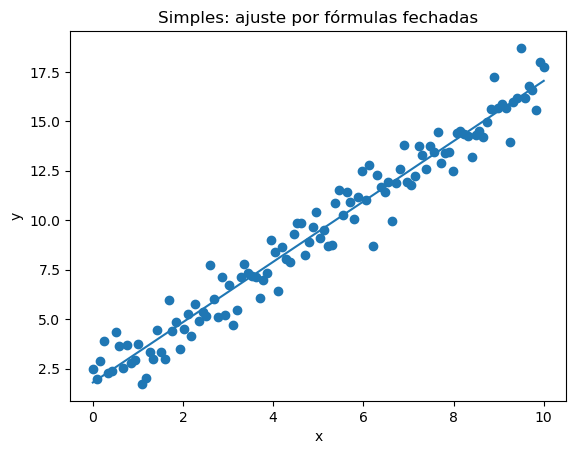

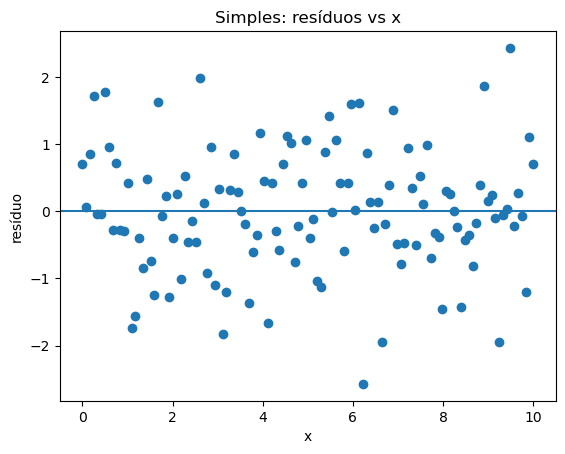

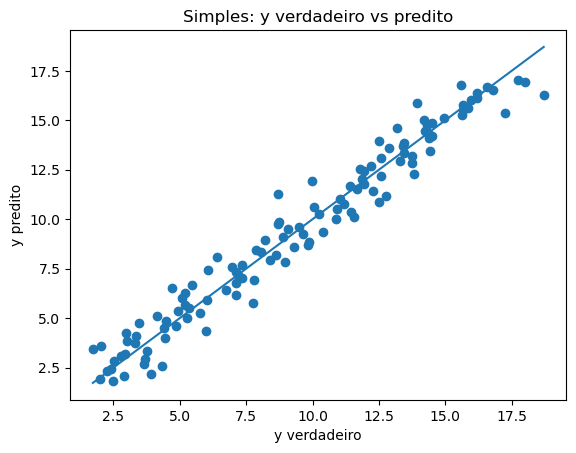

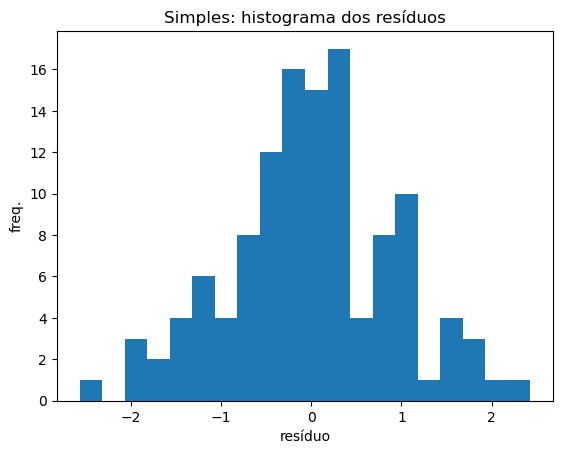

GD — beta0=1.798, beta1=1.525, RMSE=0.919


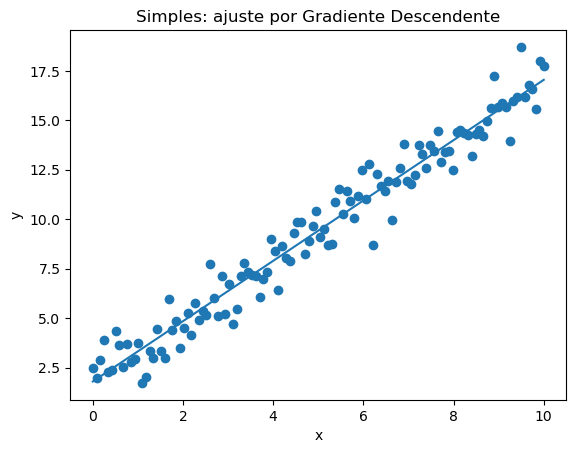

Box–Cox (no y transformado) — RMSE transformado=0.549
Multivariada — beta_hat=[ 2.01557873  1.49720219 -0.56379712], RMSE=1.079, R2=0.943


In [69]:

import numpy as np

# 1) Dados sintéticos para regressão simples
np.random.seed(42)
n = 120
x = np.linspace(0, 10, n)
y_true = 2.0 + 1.5 * x
y = y_true + np.random.normal(0, 1.0, size=n)

# Ajuste por fórmulas fechadas
beta0, beta1 = fit_simple_linear_regression(x, y)
y_hat = predict_simple(x, beta0, beta1)

# Métricas/resíduos
residuos, rmse = residuals_and_rmse(y, y_hat)
r2 = r2_score(y, y_hat)

print(f"Simples — beta0={beta0:.3f}, beta1={beta1:.3f}, RMSE={rmse:.3f}, R2={r2:.3f}")

# Visualizações
plot_simple_regression(x, y, beta0, beta1, title="Simples: ajuste por fórmulas fechadas")
plot_residuals_vs_x(x, residuos, title="Simples: resíduos vs x")
plot_fitted_vs_true(y, y_hat, title="Simples: y verdadeiro vs predito")
plot_hist_residuals(residuos, title="Simples: histograma dos resíduos")

# 2) Teste com Gradiente Descendente (mesmos dados)
beta0_gd, beta1_gd, hist = gradient_descent_simple(x, y, alpha=0.01, n_iters=2000)
y_hat_gd = predict_simple(x, beta0_gd, beta1_gd)
res_gd, rmse_gd = residuals_and_rmse(y, y_hat_gd)
print(f"GD — beta0={beta0_gd:.3f}, beta1={beta1_gd:.3f}, RMSE={rmse_gd:.3f}")

plot_simple_regression(x, y, beta0_gd, beta1_gd, title="Simples: ajuste por Gradiente Descendente")

# 3) Box–Cox rápido (aplica em y e re-ajusta por fórmulas fechadas)
#    (Atenção: use apenas se y > 0. Aqui criamos um y positivo artificialmente.)
y_pos = y - np.min(y) + 1e-3
lam = 0.3
y_bc = boxcox_transform(y_pos, lam)
b0_bc, b1_bc = fit_simple_linear_regression(x, y_bc)
y_bc_hat = predict_simple(x, b0_bc, b1_bc)
# Inverte para o espaço original só para inspecionar (não é igual a ajustar direto)
y_bc_hat_inv = boxcox_inverse(y_bc_hat, lam)

res_bc, rmse_bc = residuals_and_rmse(y_bc, predict_simple(x, b0_bc, b1_bc))
print(f"Box–Cox (no y transformado) — RMSE transformado={rmse_bc:.3f}")

# 4) Multivariada (2 preditores sintéticos)
z = np.random.randn(n)
X = np.column_stack([x, z])
beta_true = np.array([2.0, 1.5, -0.7])  # intercepto, coef_x, coef_z
Xb = add_intercept(X)
noise = np.random.normal(0, 1.2, size=n)
y_multi = Xb @ beta_true + noise

beta_hat = normal_equation(Xb, y_multi, use_pinv=False)
y_multi_hat = predict_multi(Xb, beta_hat)
res_m, rmse_m = residuals_and_rmse(y_multi, y_multi_hat)
r2_m = r2_score(y_multi, y_multi_hat)

print(f"Multivariada — beta_hat={beta_hat}, RMSE={rmse_m:.3f}, R2={r2_m:.3f}")
